<h1>Softmax Classifier</h1>

<h2>Objective</h2><ul><li> How to classify handwritten digits from the MNIST database by using Softmax classifier.</li></ul> 


<h2>Table of Contents</h2>
<p>Use a single layer Softmax to classify handwritten digits from the MNIST database.</p>

<ul>
    <li><a href="#Makeup_Data">Make some Data</a></li>
    <li><a href="#Classifier">Softmax Classifier</a></li>
    <li><a href="#Model">Define Softmax, Criterion Function, Optimizer, and Train the Model</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<hr>

<h2>Preparation</h2>


In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

# !pip install torchvision==0.9.1 torch==1.8.1 
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Plot the data
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

<h2 id="Makeup_Data">Make Some Data</h2> 

In [3]:
# Create and print the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
# Print the type of the element

print("Type of data element: ", type(train_dataset[0][0]))
print("Shape of data element: ", train_dataset[0][0].shape)

Type of data element:  <class 'torch.Tensor'>
Shape of data element:  torch.Size([1, 28, 28])


in each sampe of the train_dataset, the first element is a tensor, whereas the 2nd element is the label

In [6]:
# Print the type of the element

print("Type of data element: ", type(train_dataset[0][1]))

Type of data element:  <class 'int'>


Each element in the rectangular tensor corresponds to a number that represents a pixel intensity as demonstrated by the following image:

Type of data element:  <class 'int'>
The image:  None


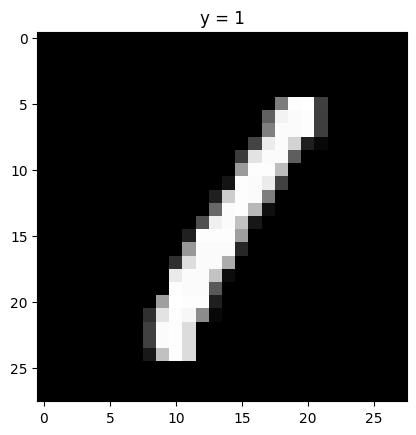

In [7]:
# Print the type of the element

print("Type of data element: ", type(train_dataset[0][1]))


# Plot the image

print("The image: ", show_data(train_dataset[3]))

<h2 id="#Classifier">Build a Softmax Classifer</h2>

In [8]:
# Define softmax classifier class

class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [9]:
# Print the shape of train dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

Flatten the tensor as shown in this image: 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2Imagetovector2.png" width="550" alt="Flattern Image">

The size of the tensor is now 784.

<h2 id="Model">Define the Softmax Classifier, Criterion Function, Optimizer, and Train the Model</h2> 

In [10]:
# Set input size and output size ---> reate the model
input_dim = 28 * 28
output_dim = 10
model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

# Print the parameters
print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
W:  torch.Size([10, 784])
b:  torch.Size([10])


In [11]:
# Define the learning rate, optimizer, criterion and data loader
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

Train the model and determine validation accuracy **(should take a few minutes)**: 

In [12]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

<h2 id="Result">Analyze Results</h2> 

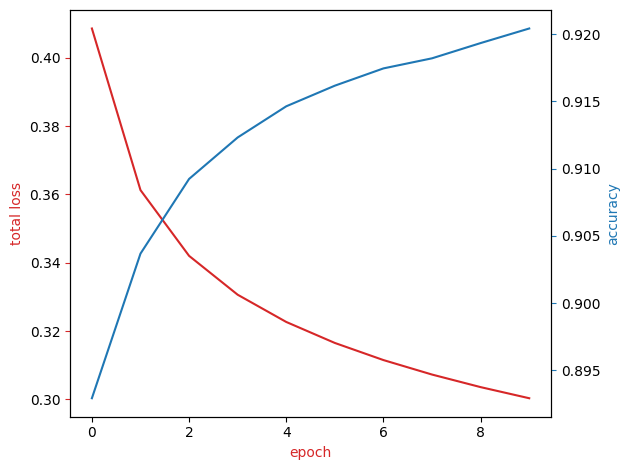

In [13]:
# Plot the loss and accuracy on the validation set

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

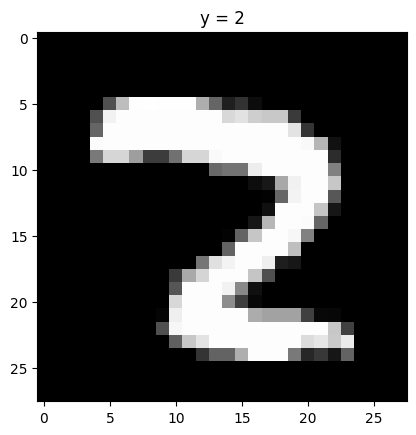

yhat: tensor([7])
probability of class  0.6911407113075256


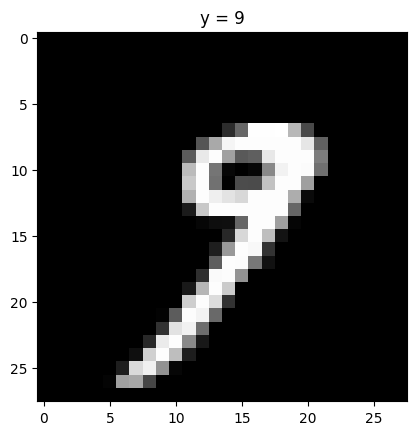

yhat: tensor([7])
probability of class  0.7169297337532043


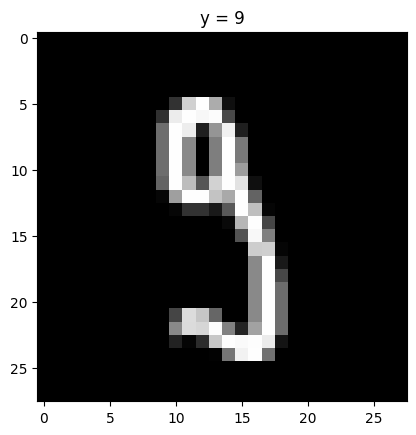

yhat: tensor([5])
probability of class  0.7258573174476624


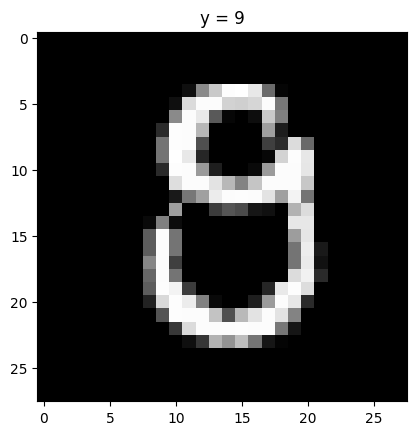

yhat: tensor([8])
probability of class  0.37025508284568787


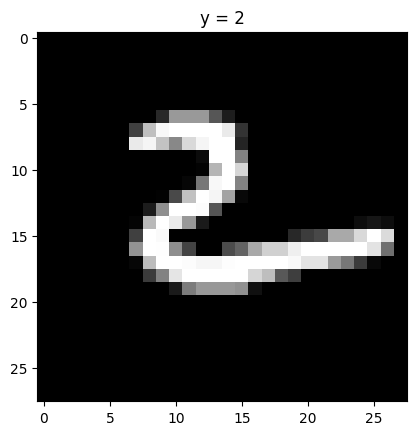

yhat: tensor([6])
probability of class  0.49737197160720825


In [14]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       